# Time-Series Analysis & Forecasting

### Dataset: https://www.gridwatch.templar.co.uk/download.php

### DataScience Lifecycle 4D framework:

#### Define
- Examine UK National Grid dataset and perform Time-Series Analysis and perform forcasting.

#### Discover
- Dataset Downloaded from: http://www.gridwatch.templar.co.uk/download.php
- Data consider from 1st June, 2011 to 27th September, 2020
- Dataset consist following features:

    - **ID:** Unique Row identifier
    
    - **TimeStamp:** Date from 1/06/2011 to 24/09/2020 (includes daily data with 5 mins of equal interval of time).
    
    - **Demand:** Sum of Demand recorded by Central Montioring Meters for 5 mins of interval. Actual demand is may higher as those met by embeded technology like small wind turbines and domestic solar panels. (solar power not included)
    
    - **Frequency:** Grid Frequency, measure instantaneous imbalance between supply and demand. Balanced Threshold frequency in UK for grid is 50 Hz.
    
    - **Coal:** Output from the last remaining British Coal Fired power stations.
    
    - **Nuclear:** Output of all Britian's Nuclear Power stations.
    
    - **CCGT:** Total output of all Britian's Combined Cycle Gas Turbine power stations.
    
    - **Wind:** Output of all Metered Wind Farms (Unmetered not included) and Included only if demand more or less in proportion to the metered wind farms output.
    
    - **Pumped:** Output from National Grid pumped storage hydroelectric power stations. Power to use to Recharge batteries is not recorded as they included only if demand increase.
    
    - **Hydro:** Total output of all National Grids hydroelectric power stations.
    
    - **Biomass:** Reflects the larger wood burining power stations, such as Drax's converted coal boiler.
    
    - **Oil:** Almost never used except in some instance in past. Currently not clear any operational plant still exists.
    
    - **Solar:** Estimated output of solar power provided by Sheffield University. Included as per best Guess values not actual measured output (expected 10% larger than reality).
    
    - **OCGT:** Records of Britain's Open Cycle Gas Turbine Plants. These are operated only at peak demands, because they're 'Gas Guzzlers'. Build as Short Term Operating Reserve Plant, plant is paid to be available at short notice (Usally used to cover winter demands).
    
    - **FrenchICT:** +ve if import or -ve if export of power via French Interconnector.
    
    - **DutchICT:** +ve if import or -ve if export of power via Dutch Interconnector (BRITNED).
    
    - **IrishICT:** +ve if import or -ve if export of power via Irish Interconnector from Scotland (Moyle).
    
    - **EWICT:** +ve if import or -ve if export of power via Irish Interconnector from Wales(East-West).
    
    - **NEMOICT:** +ve if import or -ve if export of power via NEMO Interconnector from Kent to Belgium.
    
    - **Other:** Field used to represent biomass, but now has its own field. Not clear about field currently represents: possibly some STORAGE capacity like diesels.
    
    - **North-South:** Measure of power flow recorded by the National Grid from the North of England to the South.
    
    - **Scotland-England:** Measure of power flow recorded by the National Grid from the Scotland to England. It is particular interest to those looking to assess the impact of the closure of Scotland's Nuclear and Coal plant on the economy as they putatively independent 'all renewable' Scoland.
    
    
#### Develop
#### Deploy

In [62]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import statsmodels.api as sm
from scipy.stats import shapiro

rcParams['figure.figsize'] = 20,15
print("Tensorflow version ",tf.__version__)

#import date package
import holidays
uk_holidays = holidays.UK()

#supress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

Tensorflow version  2.3.1


In [63]:
DataSet = pd.read_csv("/Users/ganesh_dhasade/Documents/GitHub/BIG_DataNationalGird/NationalGrid_1_1_12_to_27_9_20.csv")


In [64]:
DataSet.shape

(917547, 22)

In [65]:
DataSet.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,62694,2012-01-01 00:00:01,30590,50.126999,8693,7121,8568,2740,0,728,...,0.0,0,1746,992.0,0,0.0,0,0,0,0
1,62695,2012-01-01 00:05:06,30490,50.039001,8650,7120,8441,2812,0,732,...,0.0,0,1748,992.0,0,0.0,0,0,0,0
2,62696,2012-01-01 00:10:01,30802,50.000000,8880,7125,8427,2896,0,744,...,0.0,0,1748,992.0,0,0.0,0,0,0,0
3,62697,2012-01-01 00:15:01,31180,50.028999,9111,7122,8494,2964,0,748,...,0.0,0,1748,992.0,0,0.0,0,0,0,0
4,62698,2012-01-01 00:20:01,31241,50.002998,9195,7114,8449,2992,0,750,...,0.0,0,1748,992.0,0,0.0,0,0,0,0


In [66]:
TSDataset = DataSet[['timestamp','demand']]
TSDataset.head()

,timestamp,demand
0,2012-01-01 00:00:01,30590
1,2012-01-01 00:05:06,30490
2,2012-01-01 00:10:01,30802
3,2012-01-01 00:15:01,31180
4,2012-01-01 00:20:01,31241


## Data Cleaning

In [67]:
TSDataCleaning = TSDataset.copy()

In [68]:
TSDataCleaning.dtypes

timestamp    object
demand        int64
dtype: object

In [69]:
TSDataCleaning['timestamp'] = TSDataCleaning['timestamp'].astype('datetime64[ns]')
TSDataCleaning.dtypes

timestamp    datetime64[ns]
demand                int64
dtype: object

In [70]:
TSDataCleaning.timestamp.duplicated().sum()

54

In [71]:
TSDataCleaning[TSDataCleaning.timestamp.duplicated()].head()

,timestamp,demand
13840,2012-02-18 02:40:12,33171
58180,2012-07-21 06:20:51,26090
60964,2012-07-30 22:23:59,28354
61827,2012-08-02 22:25:18,29046
69011,2012-08-27 22:21:02,26932


In [72]:
TSDataCleaning[['timestamp','demand']].iloc[21995:21997,]


,timestamp,demand
21995,2012-03-17 11:20:01,38516
21996,2012-03-17 11:25:09,38483


### Observations:
- As check there are total 59 duplicate entries in dataset.
- First we remove duplicate entries and keep only one entry.

In [73]:
TSDataCleaning = TSDataCleaning.drop_duplicates(subset='timestamp', keep='first')

In [74]:
TSDataCleaning.timestamp.duplicated().sum()

0

### Merge dates
- As data available for each day in fixed 5 mins of interval.
- Merge data into each day electricity demand.

In [95]:
TSDataCleanMerge = TSDataCleaning.copy()

In [96]:
# keeping date in YYYY-MM-DD formate
TSDataCleanMerge['timestamp'] = pd.to_datetime(TSDataCleaning['timestamp'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

In [97]:
TSDataCleanMerge.dtypes

timestamp    object
demand        int64
dtype: object

In [98]:
TSDataCleanMerge['timestamp'] = TSDataCleanMerge['timestamp'].astype('datetime64[ns]')
TSDataCleanMerge.dtypes

timestamp    datetime64[ns]
demand                int64
dtype: object

In [99]:
TSDataCleanMerge.head()

,timestamp,demand
0,2012-01-01,30590
1,2012-01-01,30490
2,2012-01-01,30802
3,2012-01-01,31180
4,2012-01-01,31241


In [100]:
#TSDataCleanMerge = pd.DataFrame(TSDataCleanMerge.groupby('timestamp').sum())
TSDataCleanMerge = pd.DataFrame(round(TSDataCleanMerge.groupby('timestamp').mean()))
TSDataCleanMerge.head()

,demand
timestamp,
2012-01-01,31915.0
2012-01-02,34678.0
2012-01-03,40227.0
2012-01-04,41753.0
2012-01-05,41370.0


### EDA - Exploratory Data Analysis

In [101]:
EDATSDataset = TSDataCleanMerge.copy()

In [102]:
# lets check demand time series
def VisualizeTrend(dataframe, label):
    plt.gcf().set_size_inches(10, 10)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=dataframe.index, y=dataframe, mode='lines', name='demand'))
    fig.update_layout(showlegend=True, title = label, xaxis_title="Date/Time", yaxis_title="Demand",)
    fig.show()
    return None

    
def ScatterPlotRegLine(dataframe, label):
    df = dataframe.reset_index()
    df = df.sort_values(by=['timestamp'], ascending=[True])

    # data for time series linear regression
    df['timestamp']=pd.to_datetime(df['timestamp'])
    # to get best fit line need X in integer form, calculating number of days from jan 1970 to col date.
    df['serialtime']=[(d-datetime.datetime(1970,1,1)).days for d in df['timestamp']]

    x = sm.add_constant(df['serialtime'])

    # To get best fit value use ordinary least square function 
    # using Y i.e demand when x is 0 and x with constant i.e slope. predict = mX + Y
    model = sm.OLS(df['demand'], x).fit()
    df['bestfit']=model.fittedvalues

    # plotly setup
    fig=go.Figure()

    # source data
    fig.add_trace(go.Scatter(x=df['timestamp'],
                             y=df['demand'],
                             mode='markers',
                             name = 'score')
                 )

    # regression data
    fig.add_trace(go.Scatter(x=df['timestamp'],
                             y=df['bestfit'],
                             mode='lines',
                             name='best fit',
                             line=dict(color='firebrick', width=2)
                            ))
    fig.update_layout(showlegend=True, title = label, xaxis_title="Time", yaxis_title="Demand",)

    iplot(fig)
    return None
    
def plot_holiday_impact(dataframe, colname, holiday_list, label):
    fig = plt.figure(figsize=(16,8))
    plt.plot(dataframe[colname])
    for holiday in holiday_list:
        plt.axvline(holiday, color = 'r', ls = ':')
    plt.ylabel("demand")
    plt.title(label)
    fig.show()
    return None

In [106]:
label = "Daily Electricity Demand"
VisualizeTrend(EDATSDataset.demand, label)

<Figure size 720x720 with 0 Axes>

#### Yearly Trend

In [107]:
YearlyDemand = pd.DataFrame(EDATSDataset.demand.resample('Y').sum())
label = "Yearly Electricity Demand Trend"
VisualizeTrend(YearlyDemand.demand, label)
ScatterPlotRegLine(YearlyDemand, label)

<Figure size 720x720 with 0 Axes>

### Analysis:
- As there is clear consistent downtrend has been observed in electricity demand.
- Reasons:
    - As UK households adapting many smart devices.
    - Also, other renewal resources like solar devices at homes, small industries, hospitals etc.
    - A step drop in electricity demand observed at start of 2020 to present day because of pandemic.

### Monthly Trend

In [108]:
MonthlyDemand = pd.DataFrame(EDATSDataset.demand.resample('M').sum())
label = "Monthly Electricity Demand Trend"
VisualizeTrend(MonthlyDemand.demand, label)
ScatterPlotRegLine(MonthlyDemand, label)

<Figure size 720x720 with 0 Axes>

### Analysis:
- Monthly demand shows seasonal pattern in demand.
- This observation help while choosing forecasting model.
- Data is seasonal with approximately decrease in magnitude demand.

### Daily demand
- Let's consider 2018 & 2019 year and check daily electricity demand.

In [109]:
# 2018
Demand2018 = EDATSDataset.loc['2018-01-01':'2018-12-31']
DailyDemand = pd.DataFrame(Demand2018.demand.resample('D').sum())
label = "Daily Electricity Demand Trend in 2018"
VisualizeTrend(DailyDemand.demand, label)

#2019
Demand2019 = EDATSDataset.loc['2019-01-01':'2019-12-31']
DailyDemand = pd.DataFrame(Demand2019.demand.resample('D').sum())
label = "Daily Electricity Demand Trend in 2019"
VisualizeTrend(DailyDemand.demand, label)

<Figure size 720x720 with 0 Axes>

### Analysis:
- There is an seasonal pattern during the year.
- In 2019:
    - There is an steep decrease on 8th December, 2019.
    - Because there was an storm ATIYA, hence in many areas of uk face power cut for hours.
    - Refrence: https://www.theguardian.com/uk-news/2019/dec/09/uk-weather-britain-battered-by-high-winds-as-storm-atiya-sweeps-in

## Weekly Trend

In [110]:
WeeklyDemand = pd.DataFrame(EDATSDataset.demand.resample('W').sum())
label = "Weekly Electricity Demand Trend"
VisualizeTrend(WeeklyDemand.demand, label)
ScatterPlotRegLine(WeeklyDemand, label)

<Figure size 720x720 with 0 Axes>

## Holiday Impact on Electricity demand
- As during public holidays offices and manufacturing plants are closed.
- Assume electricity consumption is less.
- Lets check with visualization.

In [111]:
#looking at 2018
Demand2018 = EDATSDataset.loc['2018-01-01':'2018-12-31']
Demand2018['date'] = Demand2018.index.date
Demand2018['holiday'] = Demand2018['date'].apply(lambda d: d in uk_holidays)
Demand2018_holidays = Demand2018.loc[Demand2018.holiday == True].index
print(Demand2018.shape)
Demand2018.head()

(365, 3)


,demand,date,holiday
timestamp,,,
2018-01-01,30212.0,2018-01-01,True
2018-01-02,35963.0,2018-01-02,True
2018-01-03,35607.0,2018-01-03,False
2018-01-04,37574.0,2018-01-04,False
2018-01-05,38145.0,2018-01-05,False


In [112]:
Demand2019 = EDATSDataset.loc['2019-01-01':'2019-12-31']
Demand2019['date'] = Demand2019.index.date
Demand2019['holiday'] = Demand2019['date'].apply(lambda d: d in uk_holidays)
Demand2019_holidays = Demand2019.loc[Demand2019.holiday == True].index
print(Demand2019.shape)
Demand2019.head()

(365, 3)


,demand,date,holiday
timestamp,,,
2019-01-01,29352.0,2019-01-01,True
2019-01-02,36832.0,2019-01-02,True
2019-01-03,39343.0,2019-01-03,False
2019-01-04,39001.0,2019-01-04,False
2019-01-05,35749.0,2019-01-05,False


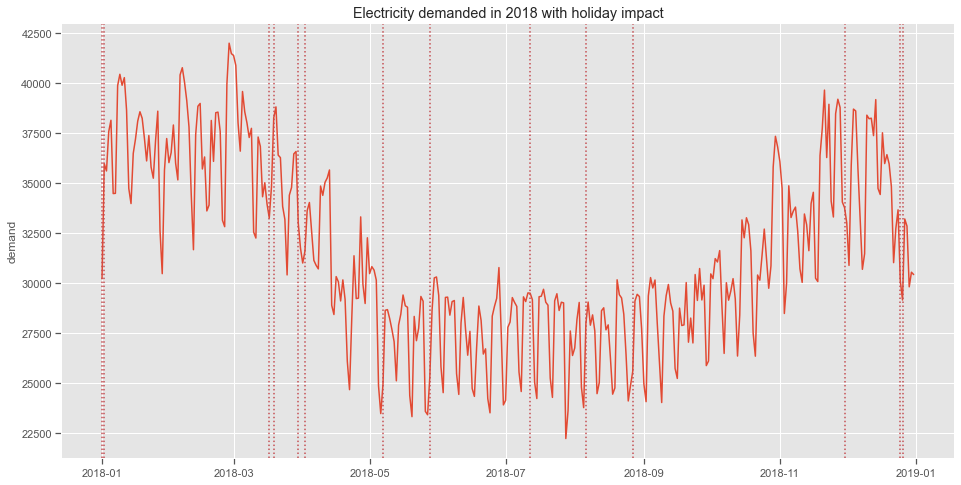

In [113]:
label = "Electricity demanded in 2018 with holiday impact"
plot_holiday_impact(Demand2018, 'demand', Demand2018_holidays, label)

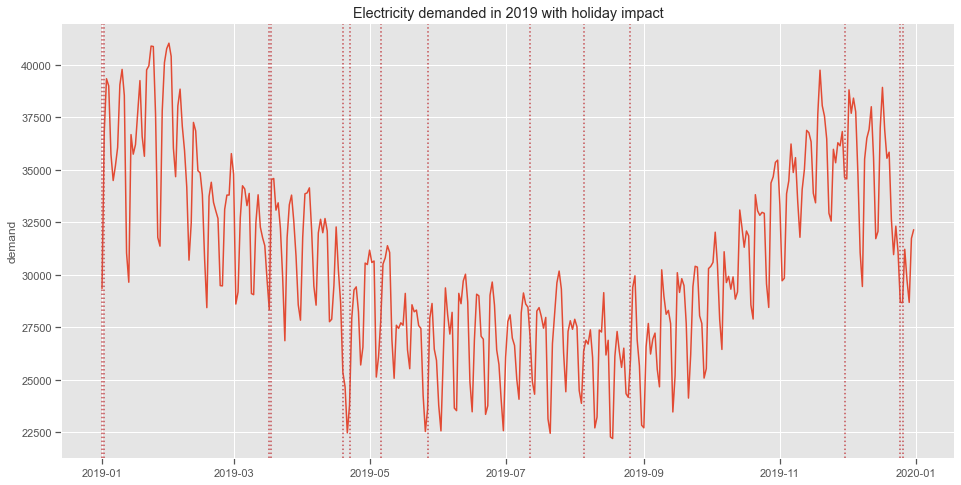

In [114]:
label = "Electricity demanded in 2019 with holiday impact"
plot_holiday_impact(Demand2019, 'demand', Demand2019_holidays, label)

### Analysis:
- During holidays electricity demand has been decreased as assumed.
- It's natural as many offices and manufacturing plants use to close.
- Hence electricity demand is less.

# -------------------- DEVELOP --------------------------

In [115]:
# Create copy of clean data
DevelopTSDataset =  TSDataCleanMerge.copy()
print(DevelopTSDataset.shape)
DevelopTSDataset.head()

(3193, 1)


,demand
timestamp,
2012-01-01,31915.0
2012-01-02,34678.0
2012-01-03,40227.0
2012-01-04,41753.0
2012-01-05,41370.0


In [116]:
# As we already resample data with day. Here we have now per day electricity demand data.
label = "Daily Electricity Demand UK Jan-2012 to Sept-2020"
VisualizeTrend(DevelopTSDataset.demand, label)

<Figure size 720x720 with 0 Axes>

In [117]:
# Basic Statistics
DevelopTSDataset.describe()

,demand
count,3193.000000
mean,32801.961478
std,5209.664941
min,19518.000000
25%,29030.000000
50%,32765.000000
75%,36339.000000
max,49793.000000


#### Results:
- As we know std deviation means as we move on Guassian distribution curve 68-95-99. Value increse by multiple of Std deviation.
- Mean is 9.42 MW & STD is 1.51 MW which describes data distributed normally.
- But as we check 75% and Max% data is much more than 50% or mean data, indicates data present outliers.

## Outliers Handling

In [118]:
def VisualiseDistribution(dataframe):
    sns.set(style="ticks")
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(dataframe, ax=ax_box, palette="Blues")
    sns.distplot(dataframe, ax=ax_hist, rug = True, color="teal")

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='demand')


def Outlier_Range(dataframe):
    DescriptiveStats = dataframe.describe()

    IQR = DescriptiveStats['75%'] - DescriptiveStats['25%']
    
    upper = DescriptiveStats['75%'] + 1.5 * IQR

    lower = DescriptiveStats['25%'] - 1.5 * IQR
    print('The upper bounds for suspected outliers are {} '.format(upper))
    print('The lower bounds for suspected outliers are {}'.format(lower))

The upper bounds for suspected outliers are 47302.5 
The lower bounds for suspected outliers are 18066.5


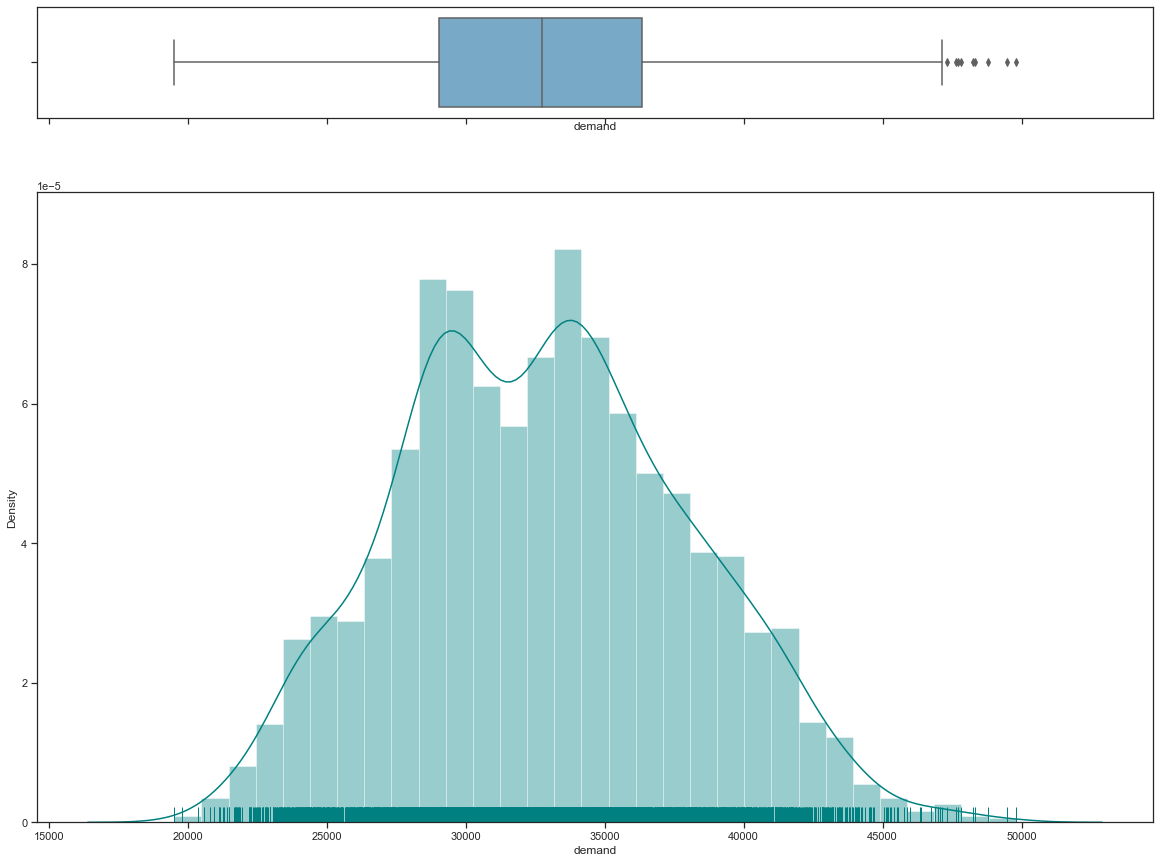

In [119]:
VisualiseDistribution(DevelopTSDataset['demand'])
Outlier_Range(DevelopTSDataset['demand'])

### Observations:
- The above box plot clearly indicate there are outliers on both end of normal distribution.
- Also curve is not bell shapped hence, it indicate there is an outliers.
- Lets inspect the outliers as per upper and lower bounds we get with help of formula:
    - Outside 1.5 times the interquartile range above the upper quartile & 
    - Below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

### Create new dataframe for outlier handling process

In [36]:
OutlierHandledTSDataset = DevelopTSDataset.copy()

### Lower Quartile Outlier Handle 

In [120]:
# Outliers exist below lower quartile
OutlierHandledTSDataset[OutlierHandledTSDataset.demand <= 18066.5]

,demand
timestamp,


### Observations:
- As there are only two entries as outliers.
- While performing EDA we found that on both day there was strom due to which powercut happened in UK.
- To handle this value we need to impute with some other value.
    - As 12th sep, 2019 was Monday (business day).
    - We try to impute value with Monday to Friday demand value.

In [121]:
#OutlierHandledTSDataset['2016-09-12': '2016-09-16']


### Observation:
- As we can see the demand from wednesday started normally.
- And as we see on wednesday and friday have approximately same electricity demand.
- Hence we will impute wednesday demand value for 12th September 2016 to make data normally distributed.

### Simillarly lets obseserve second record.
- 2019-12-08 (8th December, 19 - Day: Sunday)
- Lets check whole week data and analyse the which value we should impute to handle this outlier.

In [122]:
#OutlierHandledTSDataset['2019-12-01':'2019-12-15']

### Observation
- As we can see on weekend the electricity demand range between 8 MW to 9 MW during weekends.
- To handle this we impute last week sunday value i.e 1st December 2019.


In [123]:
# imputing wednesday i.e 2016-09-14 electricity demand.
#OutlierHandledTSDataset.loc['2016-09-12','demand'] = 8438940
# imputing last week sunday i.e 2019-12-01 electricity demand.
#OutlierHandledTSDataset.loc['2019-12-08','demand'] = 9956720

### Upper Quartile Outlier Handle

In [124]:
# Outliers exist over Upper quartile
print(len(OutlierHandledTSDataset[DevelopTSDataset.demand >= 47302.5])," number of records")
OutlierHandledTSDataset[DevelopTSDataset.demand >= 47302.5]


9  number of records


,demand
timestamp,
2012-02-02,12559928.0
2012-02-03,12559928.0
2012-02-07,12559928.0
2012-02-08,12559928.0
2012-02-09,12559928.0
2012-02-10,12559928.0
2012-12-12,12517271.0
2012-12-13,12517271.0
2013-01-15,13506632.0


### Initial Assumptions:
- As there are 9 number of records exceed the upper quartile value.
- 2012
    - In month of Feb, 2012 from 1st to 10th day the electricity demand is more.
    - Assume, as this is end of winter time due to this.
    - In same yer in month of December 12 and 13 high demand observed.
    - We check by comparing whole month electricity demand and try to impute relevant values.
- 2013
    - Only instance on 15th of jan.
    - For this we compare value for the week and check why electricity more demanded.

In [125]:
# Feb - 2012
OutlierHandledTSDataset['2012-01-25':'2012-02-25']

,demand
timestamp,
2012-01-25,12010346.0
2012-01-26,12099537.0
2012-01-27,12150674.0
2012-01-28,11176805.0
2012-01-29,11138477.0
2012-01-30,12778293.0
2012-01-31,13081550.0
2012-02-01,13239891.0
2012-02-02,12559928.0


### Observation:
- As we assumed may be because of winter time electricity demanded more is true.
- Found article: https://www.metoffice.gov.uk/weather/learn-about/weather/case-studies/snow-feb-2012
- Stats that during month of feb 2012 there is an historic snowfall observed in UK.
- Also as we see the whole month electricity demand is consistent.
- Hence to adjust or handle this outlier we impute the mean/avg demand in whole month.

In [126]:
Feb2012 = OutlierHandledTSDataset['2012-01-25':'2012-02-25']
Feb2012.head()

,demand
timestamp,
2012-01-25,12010346.0
2012-01-26,12099537.0
2012-01-27,12150674.0
2012-01-28,11176805.0
2012-01-29,11138477.0


In [127]:
round(Feb2012.demand.mean())

12293158.0

In [128]:
# imputing mean/avg electricity demand througout the month.
OutlierHandledTSDataset.loc['2012-02-02','demand'] = 12293158
OutlierHandledTSDataset.loc['2012-02-03','demand'] = 12293158
OutlierHandledTSDataset.loc['2012-02-07','demand'] = 12293158
OutlierHandledTSDataset.loc['2012-02-08','demand'] = 12293158
OutlierHandledTSDataset.loc['2012-02-09','demand'] = 12293158
OutlierHandledTSDataset.loc['2012-02-10','demand'] = 12293158

In [129]:
# 12 and 13: Dec - 2012 - Day: Wednesday & Thrusday (Business days)
OutlierHandledTSDataset['2012-12-05':'2012-12-15']

,demand
timestamp,
2012-12-05,12868248.0
2012-12-06,12597868.0
2012-12-07,12583013.0
2012-12-08,11427163.0
2012-12-09,10825906.0
2012-12-10,12641081.0
2012-12-11,13358103.0
2012-12-12,12517271.0
2012-12-13,12517271.0


### Observations:
- Simillary pattern has been observed in december too.
- During month of 2012 december weather is quite wet and all the time raining observed.
- Reference: https://blog.metoffice.gov.uk/2012/12/27/how-wet-has-2012-been-is-it-a-record-breaker/
- Due to this the electricity demand has been increase and its approximately consistent throughout the week.
- Hence, to handle this 2 days values we take mean of two weeks and impute for this two days.

In [130]:
Dec2012 = OutlierHandledTSDataset['2012-12-05':'2012-12-15']
Dec2012.head()

,demand
timestamp,
2012-12-05,12868248.0
2012-12-06,12597868.0
2012-12-07,12583013.0
2012-12-08,11427163.0
2012-12-09,10825906.0


In [131]:
DecMean = round(Dec2012.demand.mean())

In [132]:
# imputing mean/avg electricity demand observed in week.
OutlierHandledTSDataset.loc['2012-12-12','demand'] = DecMean
OutlierHandledTSDataset.loc['2012-12-13','demand'] = DecMean

In [133]:
# 15 Jan - 2013 - Tuesday (Business Day)
OutlierHandledTSDataset['2013-01-10':'2013-01-25']

,demand
timestamp,
2013-01-10,12542716.0
2013-01-11,12376017.0
2013-01-12,11293996.0
2013-01-13,10956449.0
2013-01-14,13183953.0
2013-01-15,13506632.0
2013-01-16,13558571.0
2013-01-17,13506632.0
2013-01-18,13211839.0


### Observation
- As electricity demand range between 11 - 13 MW throughout the week, except on tuesday(14).
- To handle this value we impute Thrusday (17th jan) value as it seem average or consitent range in that week.

In [134]:
# imputing same week Thrusday i.e 2013-01-17 electricity demand.
OutlierHandledTSDataset.loc['2013-01-15','demand'] = 13183953

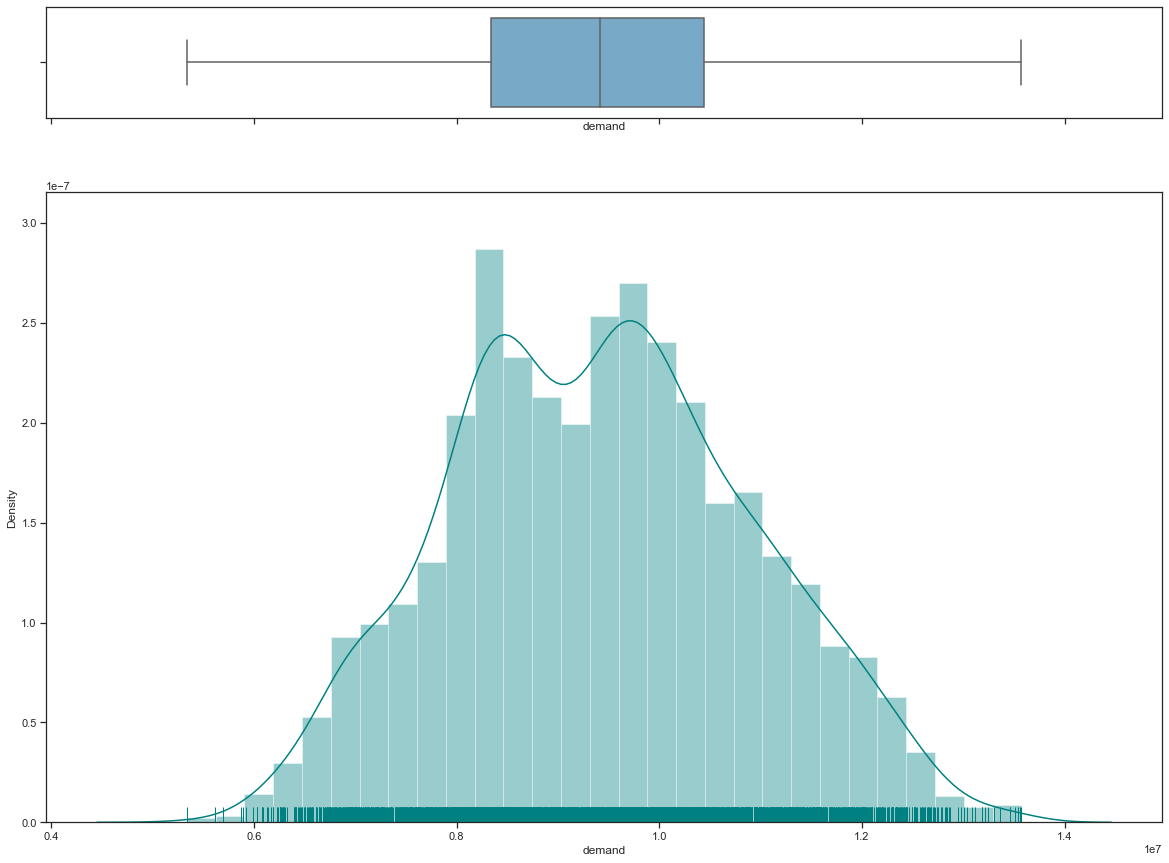

In [135]:
VisualiseDistribution(OutlierHandledTSDataset['demand'])

## Observation:
- As we can see the data is normally distributed and outliers has been handled.
- Now we have data enough clean and normally distributed to work with.

### Shapiro-Wilk Test
- To check data is normally distributed or not
- We consider p value to evaluate:
    - If p > alpha(0.05) then Accept Null hypothesis
    - If p <= alpha(0.05) then Reject Null Hypothesis
- Lets consider hypothesis:
    - H0 : Time series data is NOT Normally Distributed.
    - Ha : Time series data is Normally Distributed.

In [136]:
# Shapiro-Wilk Test
def ShapiroTest (dataframe):
    # normality test
    stat, p = shapiro(dataframe)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample does not looks Gaussian (fail to reject H0) i.e Time series data is NOT Normally Distributed.')
    else:
        print('Sample look Gaussian (reject H0) i.e Time series data is Normally Distributed.')


In [137]:
ShapiroTest (OutlierHandledTSDataset.demand)

Statistics=0.994, p=0.000
Sample look Gaussian (reject H0) i.e Time series data is Normally Distributed.


# -------------------- ARIMA Forecasting ----------------------
- ARIMA MODELLING CONSIST FOLLWOING STEPS:
    - Step 1. Time Series Decomposition plot
        - Allow to identify Seasonality-Trend-Error/Remainder.
    - Step 2. Determine ARIMA terms
        - As our data is seasonal so we have to determine seasonal as well as non seasonal parameters.
        - Insort, ARIMA (p,d,q) (P,D,Q)m
    - Step 3. Build and Validate ARIMA model
    - Step 4. Forecasting

In [138]:
# To perform ARIMA forecasting we sample data monthly i.e adding everyday electricity demand montly.
ARIMADataset = pd.DataFrame(OutlierHandledTSDataset.demand.resample('M').sum())
print(ARIMADataset.index.min())
print(ARIMADataset.index.max())
ARIMADataset.head()

2012-01-31 00:00:00
2020-09-30 00:00:00


,demand
timestamp,
2012-01-31,360462914.0
2012-02-29,352354531.0
2012-03-31,337438319.0
2012-04-30,311431166.0
2012-05-31,309211231.0


In [139]:
ARIMADataset.tail()

,demand
timestamp,
2020-05-31,202713881.0
2020-06-30,208037008.0
2020-07-31,224700540.0
2020-08-31,227079596.0
2020-09-30,207461308.0


In [140]:
#All functions


### Step 1: Time Series Decomposition plot.

#### Identify the decomposition method
- If (upward/downward) trend is linear then "ADDITIVE".
- Else "MULTIPLICATIVE"

In [141]:
label = "Monthly Electricity Demand Trend"
VisualizeTrend(ARIMADataset.demand, label)
label = "Monthly Electricity Demand scatter plot with regression best fit line"
ScatterPlotRegLine(ARIMADataset, label)

<Figure size 720x720 with 0 Axes>

### Observation:
- As data having downward linear trend.
- Hence we perform 'ADDITIVE' decomposition.

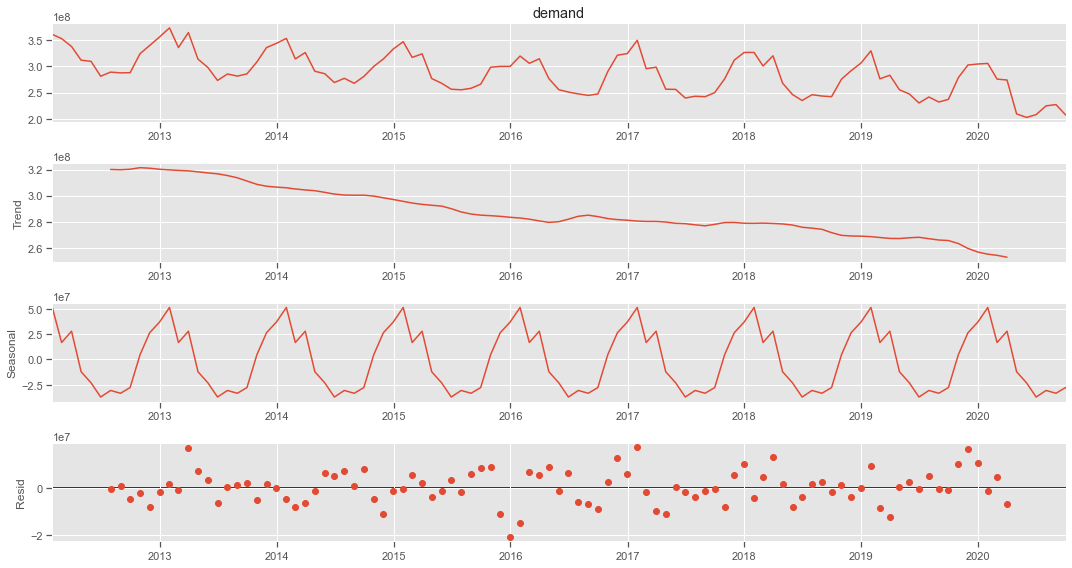

In [142]:
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15,8
decomposition = sm.tsa.seasonal_decompose(ARIMADataset.demand, model='additive')
fig = decomposition.plot()
plt.show()

### Observations:
- The trend clear DownTrend.
- Also having clear seasonality pattern.
- Residual = demand - Seasonal_component - Trend indicates the seasonal effect on trend.

## Step 2. Determine ARIMA terms

In [143]:
# Take copy dataframe
TermARIMADataset = ARIMADataset.copy()
TermARIMADataset.shape # we have 9 years data i.e 9 * 12 = 108 (105 because 2020 we have data till sept month)

(105, 1)

In [144]:
# Splitting data into Train and Testing help us to verify our predicted forecasting.
TrainTermArima = TermARIMADataset[:'2018']
TestTermArima = TermARIMADataset['2019':]

In [145]:
TrainTermArima.shape
print(TrainTermArima.index.min())
print(TrainTermArima.index.max())

2012-01-31 00:00:00
2018-12-31 00:00:00


In [146]:
TestTermArima.shape
print(TestTermArima.index.min())
print(TestTermArima.index.max())

2019-01-31 00:00:00
2020-09-30 00:00:00


### Observations:
- Here we split data into Train from 1st Jan 2012 to 31st Dec 2018
- Simillarly for Test set from 1st Jan 2019 to 30th Sept 2020

#### Data Stationary Check Test
- Perform Dicky Fuller test to confirm data is stationary or not.
- Let's consider hypothesis 
    - Ho: It is non stationary
    - Ha: It is stationary

In [147]:
## Testing For Stationarity
from statsmodels.tsa.stattools import adfuller
def adfuller_test(dataframe):
    # Provide whole data to test
    result=adfuller(dataframe)
    # As a result of test we will get 4 different statistical values as mention below
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    # code to compare p-value and check our hypothesis
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] > 0.05:
        print("Accept null hypothesis, time series has a unit root, indicating it is NON-STATIONARY ")
    else:
        print("REJECT the null hypothesis(Ho). Data has no unit root and is STATIONARY")


In [148]:
adfuller_test(TrainTermArima.demand)

ADF Test Statistic : -1.1275385175417625
p-value : 0.7039658745546691
#Lags Used : 11
Number of Observations Used : 72
Accept null hypothesis, time series has a unit root, indicating it is NON-STATIONARY 


### Preparing Data Stationary
- As suggested lags 12.
- Also data is monthly resampled.
- To make it stationary we shift data by 12 rows and take difference to make it stationary.

In [149]:
# Taking 1st difference
TrainTermArima['Seasonal_Difference_1']=TrainTermArima['demand']-TrainTermArima['demand'].shift(12)
adfuller_test(TrainTermArima.Seasonal_Difference_1.dropna())

ADF Test Statistic : -1.8228405588495054
p-value : 0.3691823912465144
#Lags Used : 12
Number of Observations Used : 59
Accept null hypothesis, time series has a unit root, indicating it is NON-STATIONARY 


### Observation:
- First difference not suffice to make data stationary.
- Lets take second difference

In [150]:
# Taking 2nd difference
TrainTermArima['Seasonal_Difference_2']=TrainTermArima['Seasonal_Difference_1']-TrainTermArima['Seasonal_Difference_1'].shift(12)
adfuller_test(TrainTermArima.Seasonal_Difference_2.dropna())

ADF Test Statistic : -5.667924032689955
p-value : 9.061278528095737e-07
#Lags Used : 2
Number of Observations Used : 57
REJECT the null hypothesis(Ho). Data has no unit root and is STATIONARY


In [151]:
# Taking 3rd difference
#TrainTermArima['Seasonal_Difference_3']=TrainTermArima['Seasonal_Difference_2']-TrainTermArima['Seasonal_Difference_2'].shift(12)
#adfuller_test(TrainTermArima.Seasonal_Difference_3.dropna())


### Result:
- Need 2 difference to make it stationary.
- As second difference we get p value is to small i.e .e-07

In [152]:
rcParams['figure.figsize'] = 15,8
label = "Stationary Data Visualization - Seasonal_Difference_1"
VisualizeTrend(TrainTermArima['Seasonal_Difference_1'].dropna(), label)
label = "Stationary Data Visualization - Seasonal_Difference_2"
VisualizeTrend(TrainTermArima['Seasonal_Difference_2'].dropna(), label)
#label = "Stationary Data Visualization - Seasonal_Difference_3"
#VisualizeTrend(TermARIMADataset['Seasonal_Difference_3'].dropna(), label)

<Figure size 720x720 with 0 Axes>

## --------- Term Identification for SARIMA ------
- Lets to identify the baseline model by imputing varation to SARIMA.

In [153]:
import itertools   
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [154]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(TrainTermArima.demand.dropna(),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3475.3562238410436
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2922.339452152077
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2548.5257068389956
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2109.1289448294424
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2562.3415707229833
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2527.011619822863
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2158.4757832551795
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2105.0816664126683
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3376.955143731622
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2872.3368044109934
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2483.892926568855
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2055.2577024041284
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2945.98328303613
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2866.2919636951924
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2136.6171912129657
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2057.0447656159713
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3006.8758875167596
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2537.890516107073

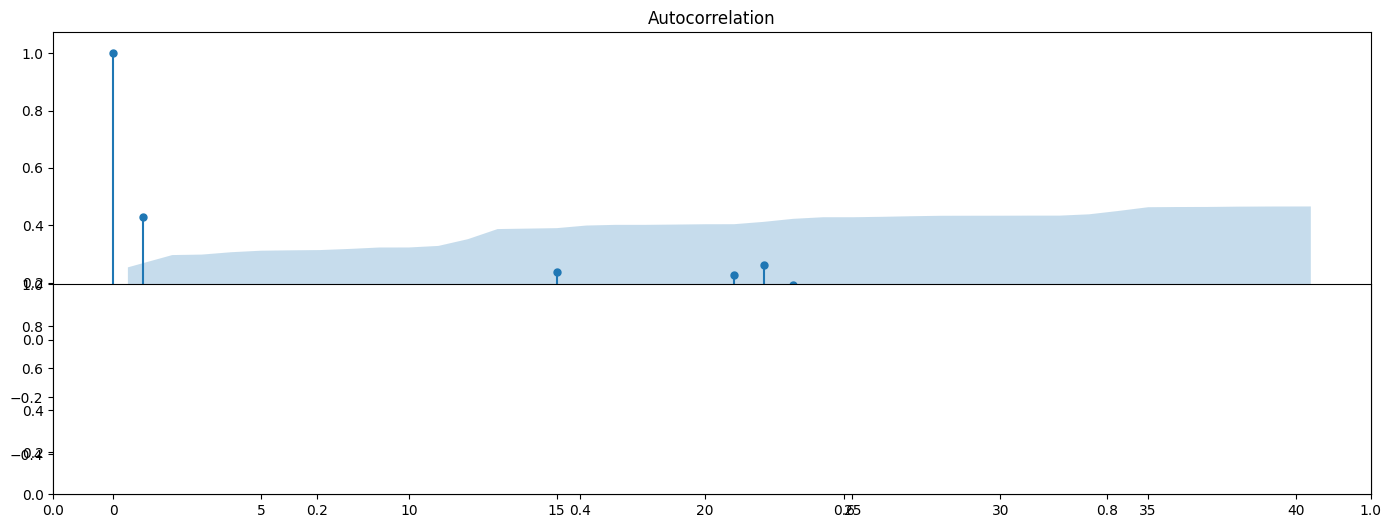

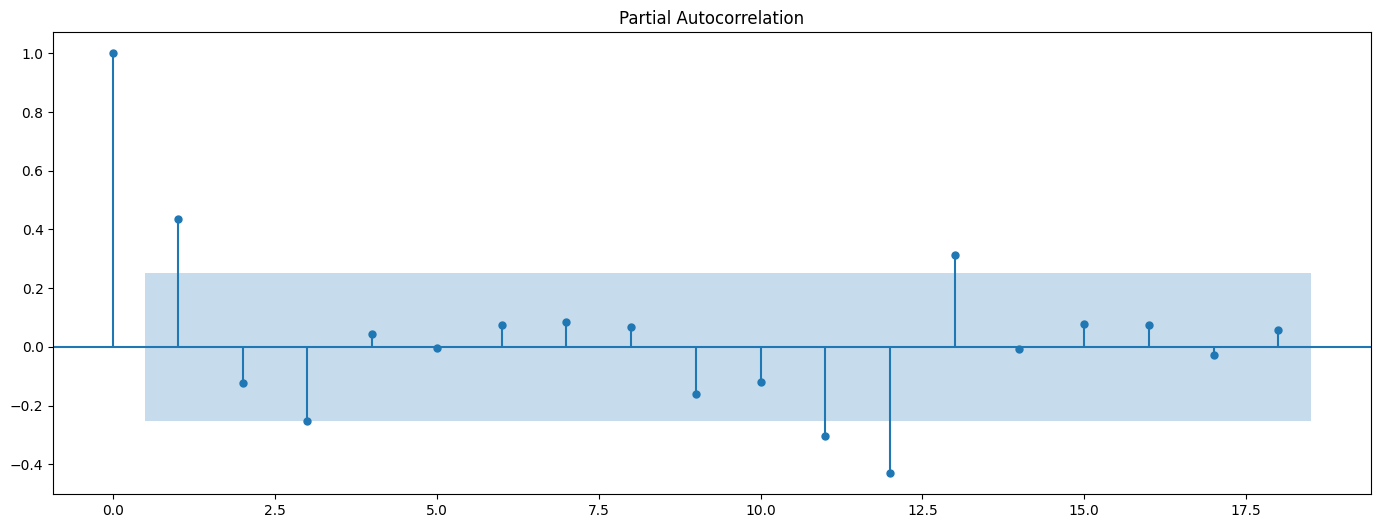

In [155]:
# Identifying p, d, q and P,D,Q values using ACF (Auto Correlation Function plot and Partial Auto Correlation function plot)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
rcParams['figure.figsize'] = 17,6  # change figure size
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TrainTermArima['Seasonal_Difference_2'].dropna(),lags=40)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TrainTermArima['Seasonal_Difference_2'].dropna())



In [157]:
order=(1,2,1)
seasonal_order=(1,2,1,12)
mod = sm.tsa.statespace.SARIMAX(TrainTermArima.demand.dropna(),
                                            order=order,
                                            seasonal_order=seasonal_order,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(order, seasonal_order, results.aic))

ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:1611.6908901600311


In [158]:
order=(1,2,0)
seasonal_order=(1,2,0,12)
mod = sm.tsa.statespace.SARIMAX(TrainTermArima.demand.dropna(),
                                            order=order,
                                            seasonal_order=seasonal_order,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(order, seasonal_order, results.aic))

ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:1662.6069718671406


In [159]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             demand   No. Observations:                   84
Model:             SARIMAX(1, 2, 0)x(1, 2, 0, 12)   Log Likelihood                -828.303
Date:                            Wed, 30 Sep 2020   AIC                           1662.607
Time:                                    12:38:09   BIC                           1668.027
Sample:                                01-31-2012   HQIC                          1664.627
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5338      0.187     -2.848      0.004      -0.901      -0.167
ar.S.L12      -0.6610      0.201   

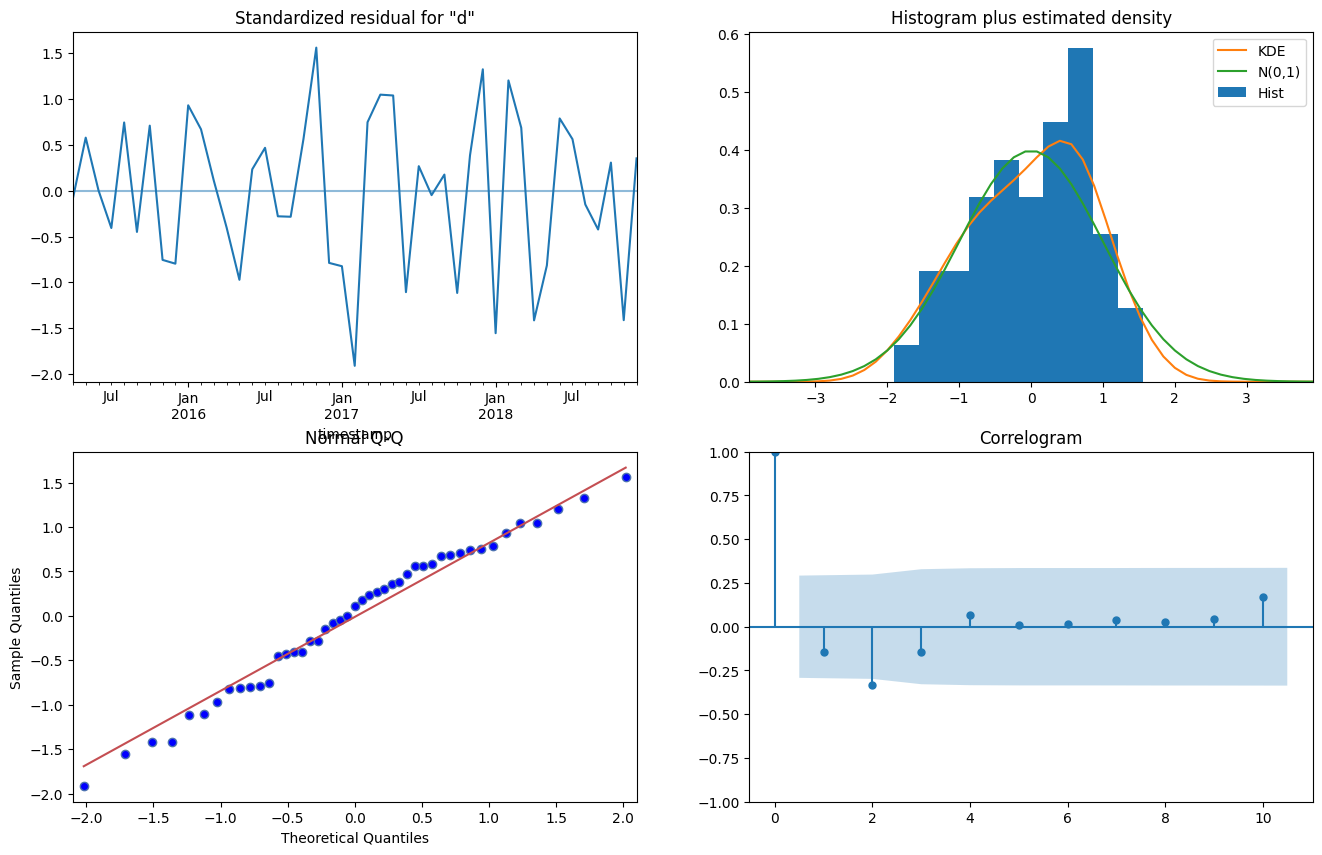

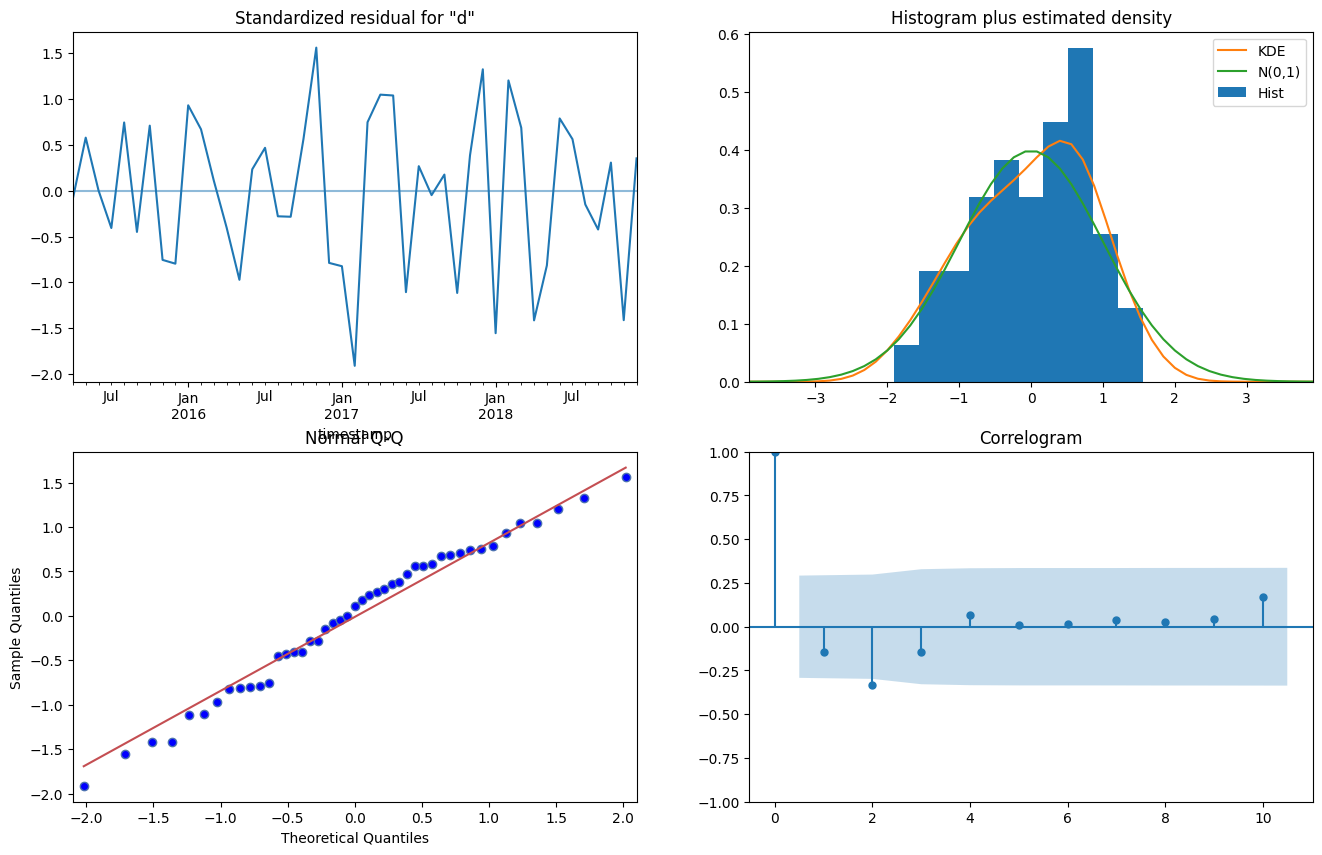

In [160]:
results.plot_diagnostics(figsize = (16,10))

In [161]:
train_preds = results.forecast(steps=12+12)

In [162]:
train_preds

2019-01-31    2.768274e+08
2019-02-28    2.195419e+08
2019-03-31    2.209563e+08
2019-04-30    1.459068e+08
2019-05-31    1.121207e+08
2019-06-30    7.702770e+07
2019-07-31    7.711146e+07
2019-08-31    5.738796e+07
2019-09-30    3.847056e+07
2019-10-31    4.536145e+07
2019-11-30    3.987192e+07
2019-12-31    4.409735e+07
2020-01-31   -2.969043e+07
2020-02-29   -9.695029e+07
2020-03-31   -1.087176e+08
2020-04-30   -2.162209e+08
2020-05-31   -2.861691e+08
2020-06-30   -3.439314e+08
2020-07-31   -3.604626e+08
2020-08-31   -4.050503e+08
2020-09-30   -4.538724e+08
2020-10-31   -4.691576e+08
2020-11-30   -5.128072e+08
2020-12-31   -5.300529e+08
Freq: M, Name: predicted_mean, dtype: float64

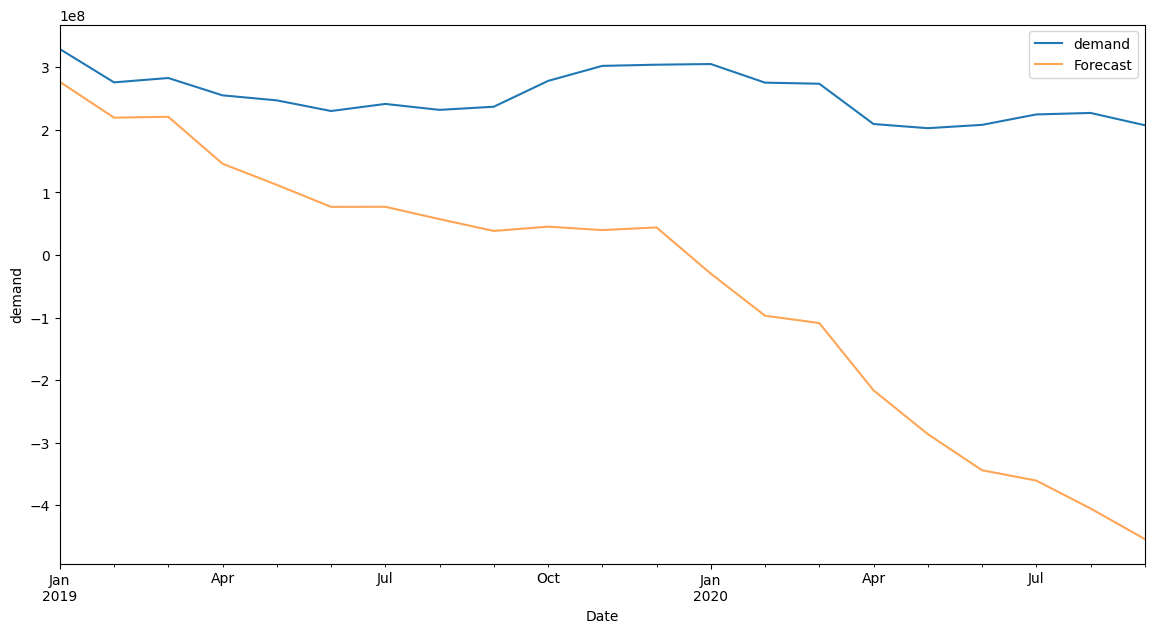

In [163]:
train_preds = results.forecast(steps=12+9)
#putting the forecasts and the actual values from the test set together in a dataframe
ax = TestTermArima['2019':].plot(label='observed')
train_preds.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('demand')
plt.legend()
plt.show()

In [164]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(TestTermArima, train_preds))
print('RMSE: %.3f' % rmse)

RMSE: 355399587.347
